In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sn

In [109]:
bollywood_df = pd.read_csv("C:/Term 3/Supervised learning with python/Codes-Data-Files/Machine Learning (Codes and Data Files)/Data/bollywood.csv")
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [110]:
bollywood_df = bollywood_df.set_index("SlNo")
bollywood_df.head()

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [111]:
len(bollywood_df)

149

In [112]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 1 to 149
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release Date         149 non-null    object 
 1   MovieName            149 non-null    object 
 2   ReleaseTime          149 non-null    object 
 3   Genre                149 non-null    object 
 4   Budget               149 non-null    int64  
 5   BoxOfficeCollection  149 non-null    float64
 6   YoutubeViews         149 non-null    int64  
 7   YoutubeLikes         149 non-null    int64  
 8   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 11.6+ KB


In [113]:
GenList = []
for x in bollywood_df["Genre"]:
    GenList.append(x.strip())
GenSer = pd.Series(GenList)
GenSer.index = [index+1 for index in GenSer.index]
bollywood_df["Genre"] = GenSer
bollywood_df["Genre"].unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

In [114]:
bollywood_df["Genre"].value_counts()
#comedy genre has highest number of movies 

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

In [115]:
gen_count = bollywood_df["Genre"].value_counts()

In [116]:
bollywood_df["Genre"].unique()

array(['Romance', 'Thriller', 'Comedy', 'Drama', 'Action'], dtype=object)

In [117]:
bollywood_df

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...
145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807


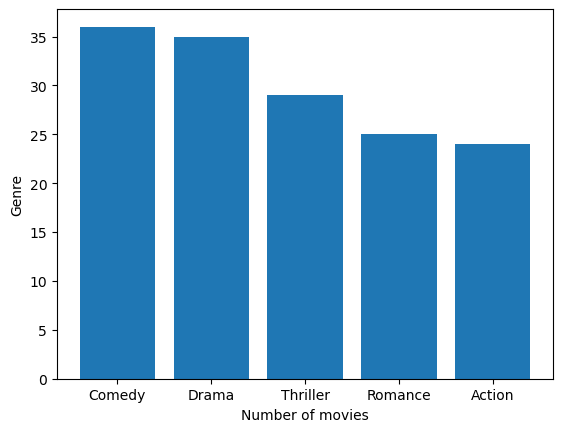

In [118]:
plt.bar(gen_count.index,gen_count.values)
plt.xlabel("Number of movies")
plt.ylabel("Genre")
plt.show()

In [119]:
pd.crosstab(bollywood_df["Genre"],bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [97]:
type(bollywood_df["Release Date"].iloc[0])

str

In [129]:
extract_months = []
for x in bollywood_df["Release Date"]:
    extract_months.append(datetime.strptime(x,"%d-%b-%y").month)
monthSer = pd.Series(extract_months)
monthSer

    

0      4
1      1
2      7
3      1
4      7
      ..
144    2
145    3
146    3
147    3
148    5
Length: 149, dtype: int64

In [130]:
monthSer.index = [index+1 for index in monthSer.index]

In [131]:
monthSer

1      4
2      1
3      7
4      1
5      7
      ..
145    2
146    3
147    3
148    3
149    5
Length: 149, dtype: int64

In [132]:
bollywood_df['Release Month'] = monthSer

In [133]:
bollywood_df

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month
SlNo,,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7
...,...,...,...,...,...,...,...,...,...,...
145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,2
146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,3
147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,3


In [134]:
bollywood_df["Release Month"].value_counts()

Release Month
1     20
3     19
5     18
7     16
2     16
4     11
9     10
6     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64

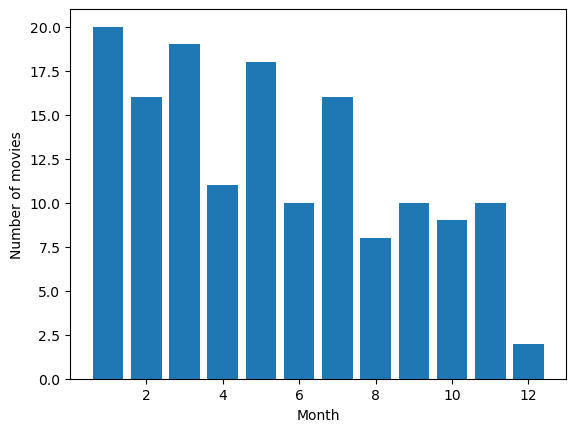

In [136]:
plt.bar(bollywood_df["Release Month"].value_counts().index,bollywood_df["Release Month"].value_counts().values)
plt.ylabel("Number of movies")
plt.xlabel("Month")
plt.show()

Here we can see the maximum number of movies are released in january

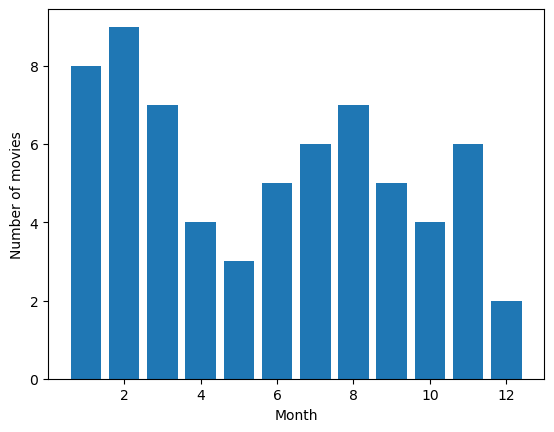

In [138]:
highBudMov = bollywood_df[bollywood_df["Budget"]>=25]
plt.bar(highBudMov["Release Month"].value_counts().index,highBudMov["Release Month"].value_counts().values)
plt.ylabel("Number of movies")
plt.xlabel("Month")
plt.show()

Maximum number of high budget movies are released in month of Feburary

In [143]:
bollywood_df["ROI"] = (bollywood_df["BoxOfficeCollection"] - bollywood_df["Budget"])/bollywood_df["Budget"]
top10MoviesByROI = bollywood_df.sort_values(by = "ROI",ascending = False)
top10MoviesByROI.head(10)

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
SlNo,,,,,,,,,,,
65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667
90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000
59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,5.933333
129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,4.466667


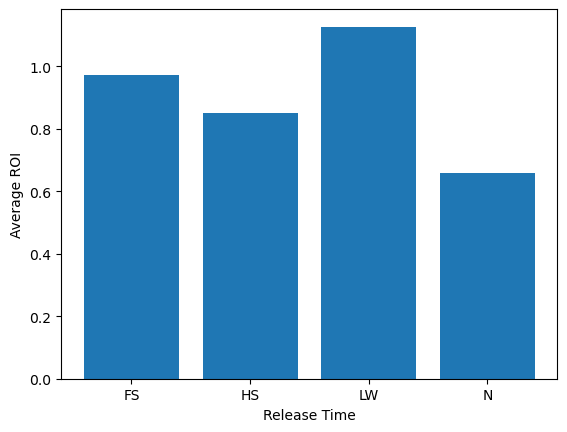

In [145]:
releaseTimeROI = bollywood_df.groupby("ReleaseTime")["ROI"].mean()
plt.bar(releaseTimeROI.index,releaseTimeROI.values)
plt.xlabel("Release Time")
plt.ylabel("Average ROI")
plt.show()


Here we can see that movies released during Long weekend have higher ROI. This helps in further deciding the appropriate time during which the movie should be released


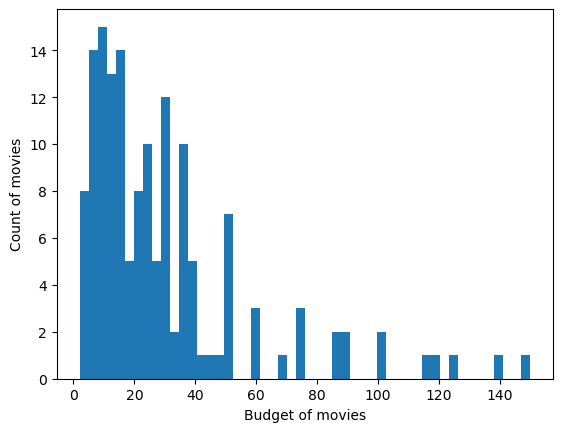

In [149]:
plt.hist(bollywood_df["Budget"],bins=50)
plt.xlabel("Budget of movies")
plt.ylabel("Count of movies")
plt.show()

From the graph we can see that most movies are low budgeted.

C:\Users\sarth\AppData\Local\Temp\ipykernel_17868\717525324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bollywood_df[bollywood_df["Genre"]=="Comedy"]["Budget"],bins=20)


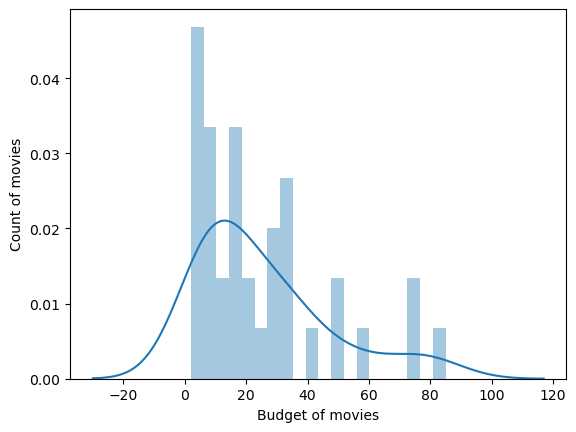

In [163]:
sn.distplot(bollywood_df[bollywood_df["Genre"]=="Comedy"]["Budget"],bins=20)
plt.xlabel("Budget of movies")
plt.ylabel("Count of movies")
plt.show()

C:\Users\sarth\AppData\Local\Temp\ipykernel_17868\1306739047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bollywood_df[bollywood_df["Genre"]=="Drama"]["Budget"],bins=20,color  = "r",label = "Drama")
C:\Users\sarth\AppData\Local\Temp\ipykernel_17868\1306739047.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

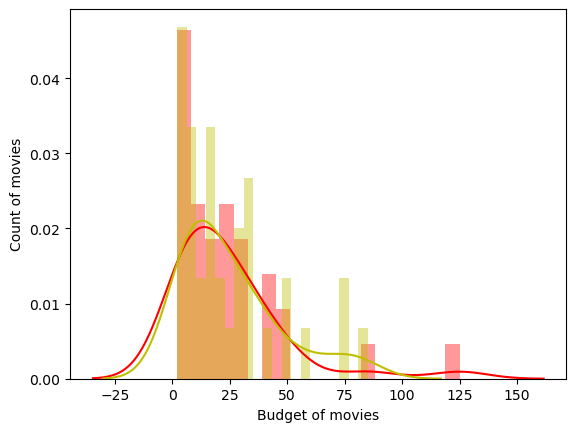

In [167]:
sn.distplot(bollywood_df[bollywood_df["Genre"]=="Drama"]["Budget"],bins=20,color  = "r",label = "Drama")
sn.distplot(bollywood_df[bollywood_df["Genre"]=="Comedy"]["Budget"],bins=20,color  = "y",label = "Comedy")
plt.xlabel("Budget of movies")
plt.ylabel("Count of movies")
plt.show()

Here we can see that distribution for budget is same both for comedy and drama movies

<Axes: xlabel='YoutubeLikes', ylabel='BoxOfficeCollection'>

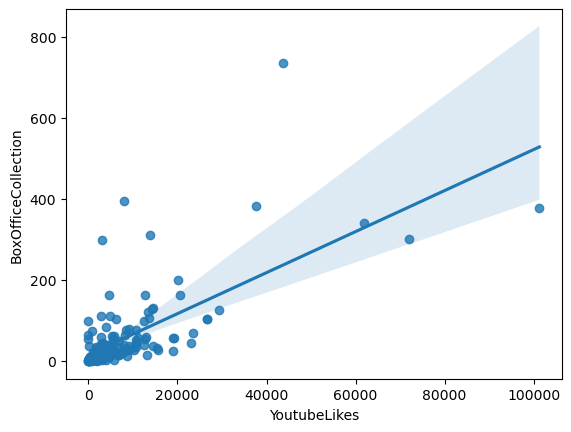

In [169]:
sn.regplot(x = "YoutubeLikes",y = "BoxOfficeCollection",data = bollywood_df)


There is a positive co-relation between youtube likes and Box office collection

<Axes: xlabel='Genre', ylabel='BoxOfficeCollection'>

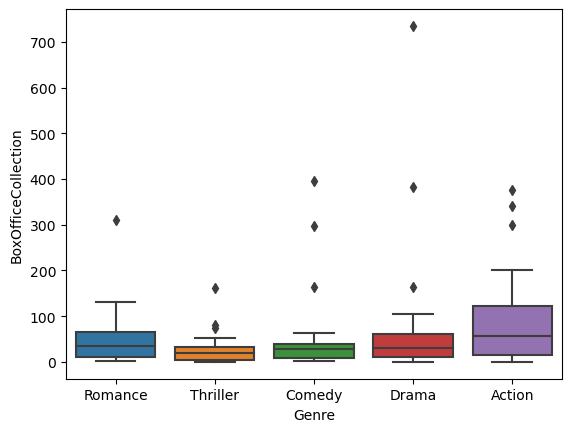

In [170]:
sn.boxplot(x="Genre",y = "BoxOfficeCollection",data=bollywood_df)

In [172]:
bollywood_df.columns

Index(['Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'Release Month', 'ROI'],
      dtype='object')

In [174]:
InvestigatingVariables = ['BoxOfficeCollection','YoutubeViews','Budget','YoutubeLikes','YoutubeDislikes']
bollywood_df[InvestigatingVariables].corr()


,BoxOfficeCollection,YoutubeViews,Budget,YoutubeLikes,YoutubeDislikes
BoxOfficeCollection,1.000000,0.588632,0.650401,0.682517,0.623941
YoutubeViews,0.588632,1.000000,0.589038,0.884055,0.846739
Budget,0.650401,0.589038,1.000000,0.608916,0.665343
YoutubeLikes,0.682517,0.884055,0.608916,1.000000,0.859730
YoutubeDislikes,0.623941,0.846739,0.665343,0.859730,1.000000


<Axes: >

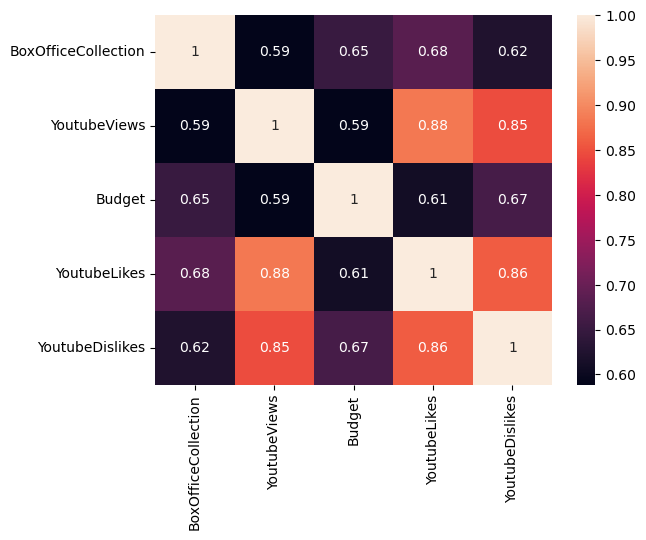

In [175]:
sn.heatmap(bollywood_df[InvestigatingVariables].corr(),annot=True)